# prédire les passagers ayant survécu au naufrage du Titanic.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [123]:
#importer le dataset à l’aide de la fonction read_csv.
df=pd.read_csv('train.csv')

In [124]:
#1.	Afficher les 10 premières 



df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [125]:
 #les 10 dernières lignes du DataFrame.
df.tail(10)   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [80]:
#2.	Afficher les dimensions du DataFrame.
df.shape

(891, 12)

In [81]:
#3.	Afficher les variables et déterminer leurs types (quantitatives/qualitatives)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
#a.	Déterminer les variables catégoriques. Les valeurs sont-elles ordinales ou nominales ?

# Sélectionner uniquement les colonnes avec des types de données catégoriques
df.select_dtypes(include=['object', 'category']).columns


#son tous des valeurs 


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [84]:
#ounumeric_columns = df.select_dtypes(exclude=['object', 'category']).columns
df.select_dtypes(include=['number']).columns



Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [85]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [86]:
#pour survived il est en coder alors il est categoriene pas numerique
categorienne=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Cabin','Embarked']]
#nominal

In [87]:
'''
Les variables catégoriques ordinales ont des catégories qui ont un ordre intrinsèque. 
Par exemple, "faible", "moyen", "élevé" sont des catégories ordinales car il y a un ordre naturel entre elles.

Les variables catégoriques nominales n'ont pas d'ordre intrinsèque entre les catégories. Par exemple, 
les couleurs, les types de fruits, etc., sont des catégories nominales car elles n'ont pas de relation ordonnée.

'''


'\nLes variables catégoriques ordinales ont des catégories qui ont un ordre intrinsèque. \nPar exemple, "faible", "moyen", "élevé" sont des catégories ordinales car il y a un ordre naturel entre elles.\n\nLes variables catégoriques nominales n\'ont pas d\'ordre intrinsèque entre les catégories. Par exemple, \nles couleurs, les types de fruits, etc., sont des catégories nominales car elles n\'ont pas de relation ordonnée.\n\n'

In [88]:
#b.	Déterminer les variables numériques. Les valeurs sont-elles continues, discrètes ?
numeric=df[['PassengerId','Fare']]
#Fare continue et PassengerId discrete

In [102]:
#c.	Déterminer les variables mixtes (alphanumérique).
alphanumerique=df[['Name','Ticket']]

In [90]:
#4.	Vérifier le type des différentes variables (int, float…) ?
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [91]:
#5.	Trouver les variables ayant des valeurs manquantes. Afficher le pourcentage des valeurs manquantes pour chaque variable.
print(df.isnull().sum())

#age ,Cabin,Embarked
#pourcentage ona le total est 891
age_p=round((177/891)*100,2)
Cabin_p=round((687/891)*100,2)
Embarked_p=round((2/891)*100,2)
print('age pourcent',age_p,'%')
print('cabin pourcent',Cabin_p,'%')
print('embarked pourcent',Embarked_p,'%')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
age pourcent 19.87 %
cabin pourcent 77.1 %
embarked pourcent 0.22 %


In [92]:
df.shape

(891, 12)

In [93]:
missing_values = df.isnull().sum()

# Calculer le pourcentage de valeurs manquantes pour chaque variable
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [94]:
#6.	Supprimer les variables inexploitables (e.g. Name, PassengerId)
df.drop(['Name','PassengerId'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [95]:
#7.	Réaliser des analyses univariables pour chaque variable du dataset.
#variables numériques, calculez les statistiques descriptives telles que la moyenne, la médiane, l'écart type, etc.

moyen=df['Fare'].mean()
ecart=df['Fare'].std()
minn=df['Fare'].min()
maxx=df['Fare'].max()
q1 =np.percentile(df['Fare'], 25)
q2 =np.percentile(df['Fare'], 50)  # Médiane
q3 =np.percentile(df['Fare'], 75)
print('la moyen de Fare : ',moyen)
print(" l'ecart type de Fare : ",ecart)
print(" le min de Fare : ",minn)
print(" le max de Fare : ",maxx)
print(" q1 de Fare : ",q1)
print(" q2 de Fare : ",q2)
print(" q3 de Fare : ",q3)

la moyen de Fare :  32.2042079685746
 l'ecart type de Fare :  49.693428597180905
 le min de Fare :  0.0
 le max de Fare :  512.3292
 q1 de Fare :  7.9104
 q2 de Fare :  14.4542
 q3 de Fare :  31.0


In [96]:
fare_stats = df['Fare'].describe()
fare_stats

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [97]:
#b.	Pour les variables catégoriques, affichez les fréquences des différentes catégories

categorienne

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [98]:
for column in categorienne:
    print(column)
    print(round(df[column].value_counts()/len(df),2))

Survived
0    0.62
1    0.38
Name: Survived, dtype: float64
Pclass
3    0.55
1    0.24
2    0.21
Name: Pclass, dtype: float64
Sex
male      0.65
female    0.35
Name: Sex, dtype: float64
Age
24.00    0.03
22.00    0.03
18.00    0.03
19.00    0.03
28.00    0.03
         ... 
36.50    0.00
55.50    0.00
0.92     0.00
23.50    0.00
74.00    0.00
Name: Age, Length: 88, dtype: float64
SibSp
0    0.68
1    0.23
2    0.03
4    0.02
3    0.02
8    0.01
5    0.01
Name: SibSp, dtype: float64
Parch
0    0.76
1    0.13
2    0.09
5    0.01
3    0.01
4    0.00
6    0.00
Name: Parch, dtype: float64
Cabin
B96 B98        0.0
G6             0.0
C23 C25 C27    0.0
C22 C26        0.0
F33            0.0
              ... 
E34            0.0
C7             0.0
C54            0.0
E36            0.0
C148           0.0
Name: Cabin, Length: 147, dtype: float64
Embarked
S    0.72
C    0.19
Q    0.09
Name: Embarked, dtype: float64


In [99]:
#8.	Explorer les relations entre les différentes variables du dataset.
# histogrammes, des box plots, des bar plots..,pour visualiser les relations entre les variables numériques et catégoriques.
import seaborn as sb

numeric

,PassengerId,Fare
0,1,7.2500
1,2,71.2833
2,3,7.9250
3,4,53.1000
4,5,8.0500
...,...,...
886,887,13.0000
887,888,30.0000
888,889,23.4500
889,890,30.0000


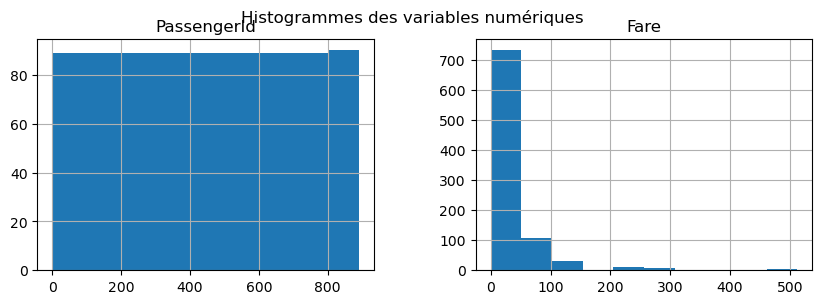

In [107]:
# Histogrammes des variables numériques

numeric.hist(figsize=(10,3))
plt.suptitle("Histogrammes des variables numériques")
plt.show()

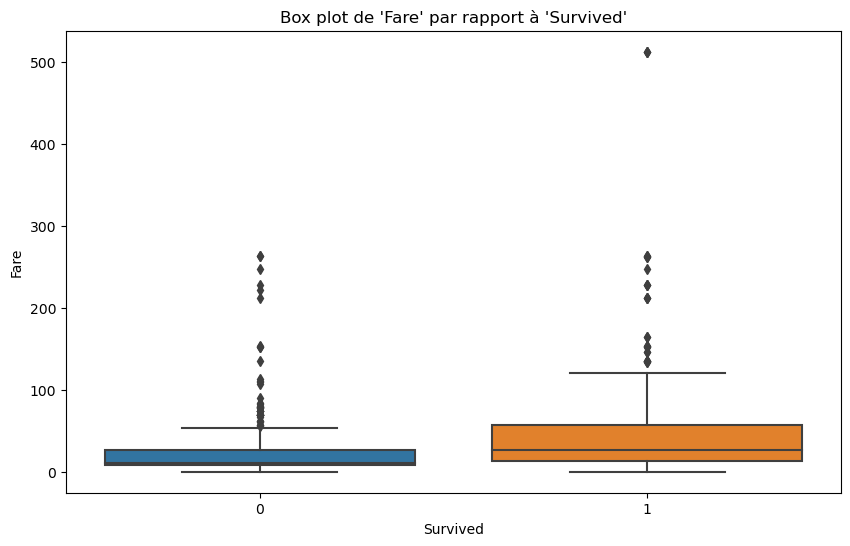

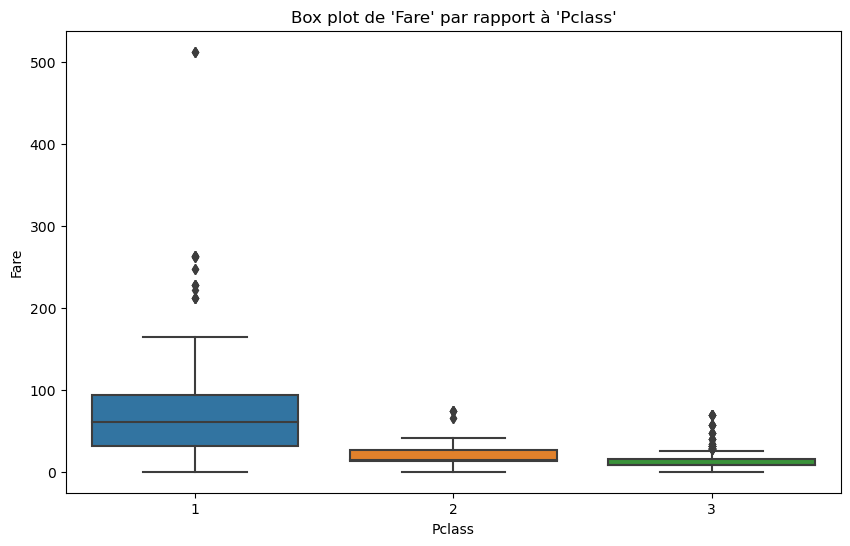

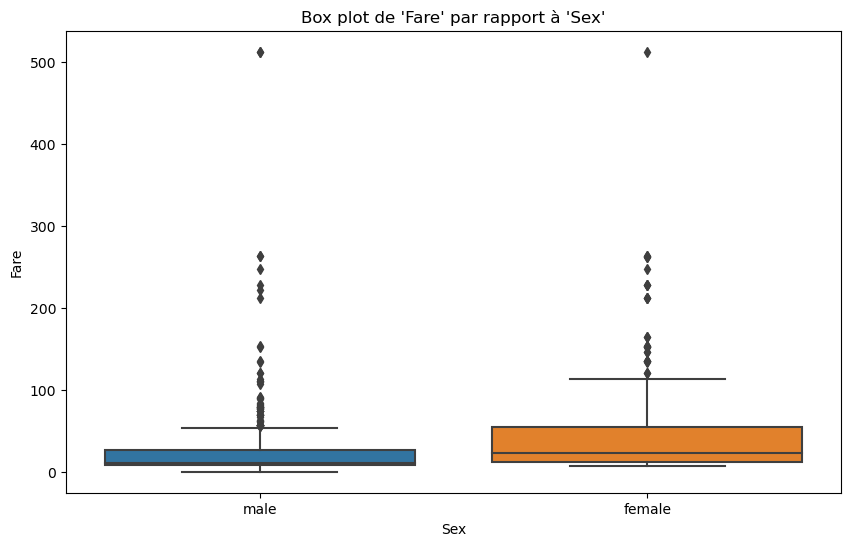

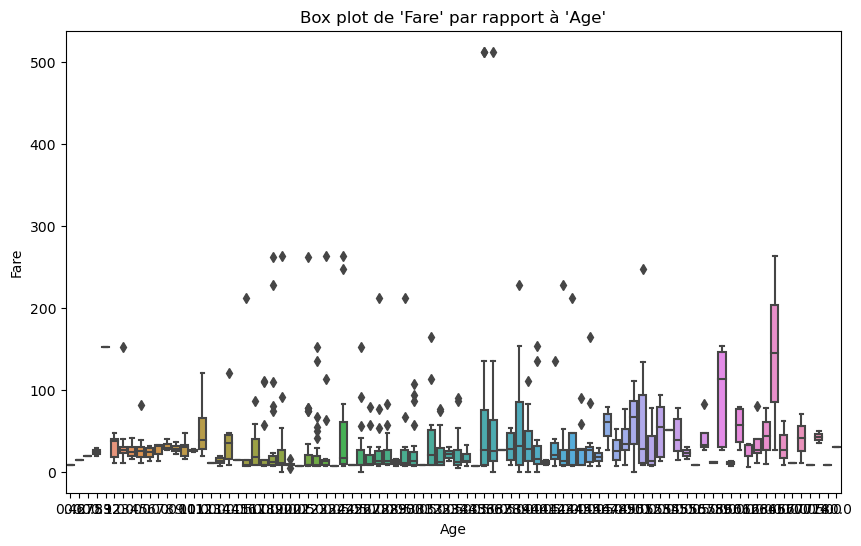

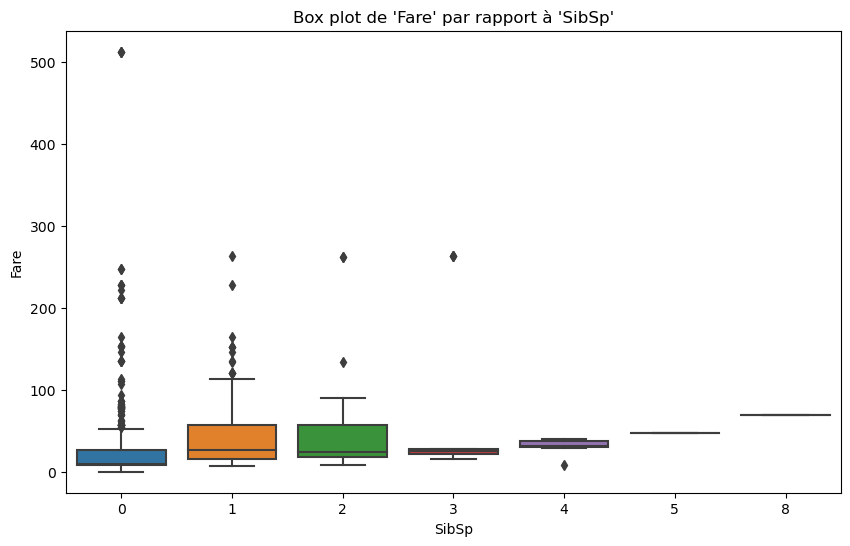

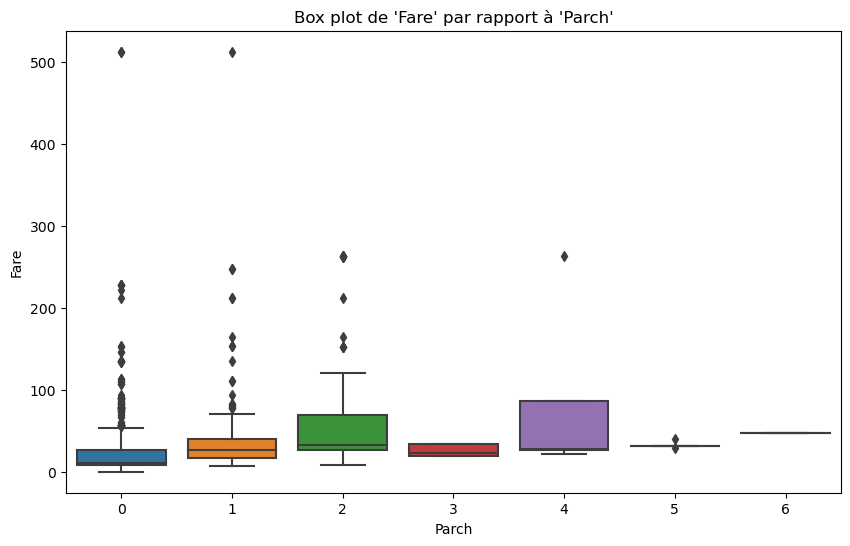

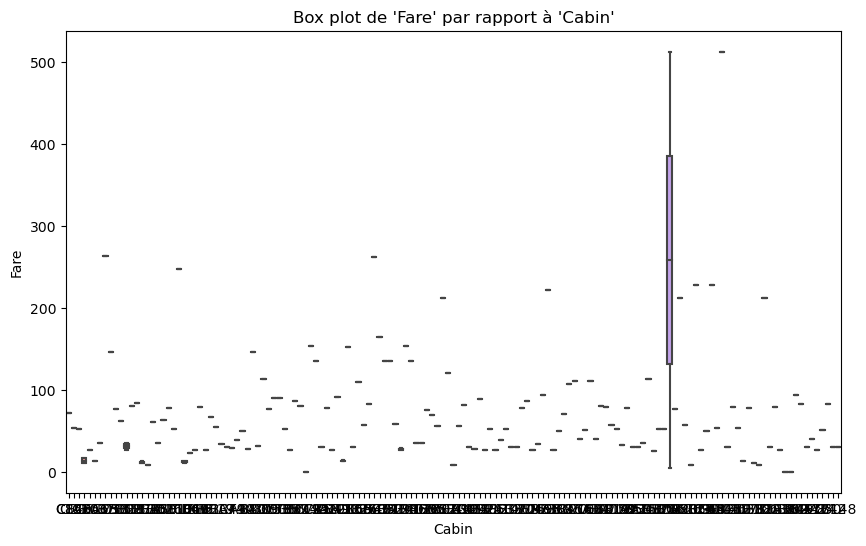

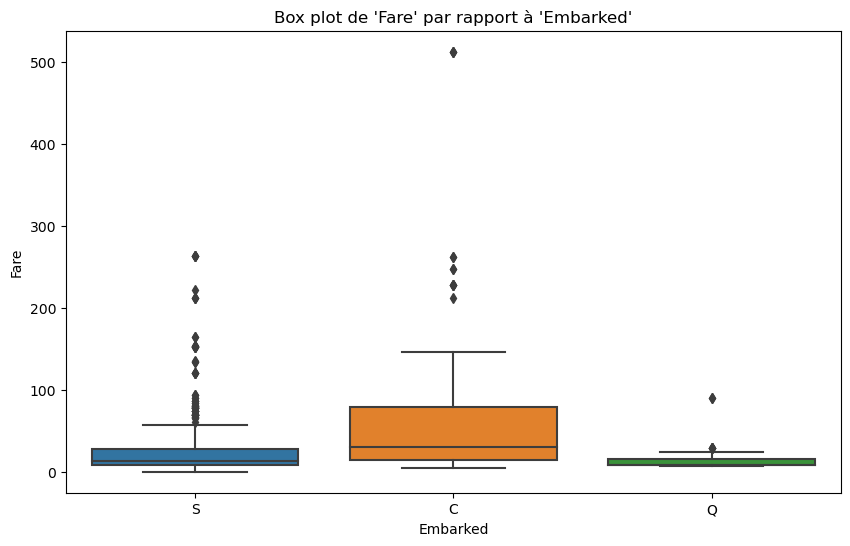

In [111]:
# Box plots des variables numériques par rapport aux variables catégoriques
for cat_col in categorienne.columns:
    plt.figure(figsize=(10, 6))#(c'est-à-dire la largeur et la hauteur)
    sb.boxplot(x=cat_col, y='Fare', data=df)
    plt.title(f"Box plot de 'Fare' par rapport à '{cat_col}'")
    plt.show()

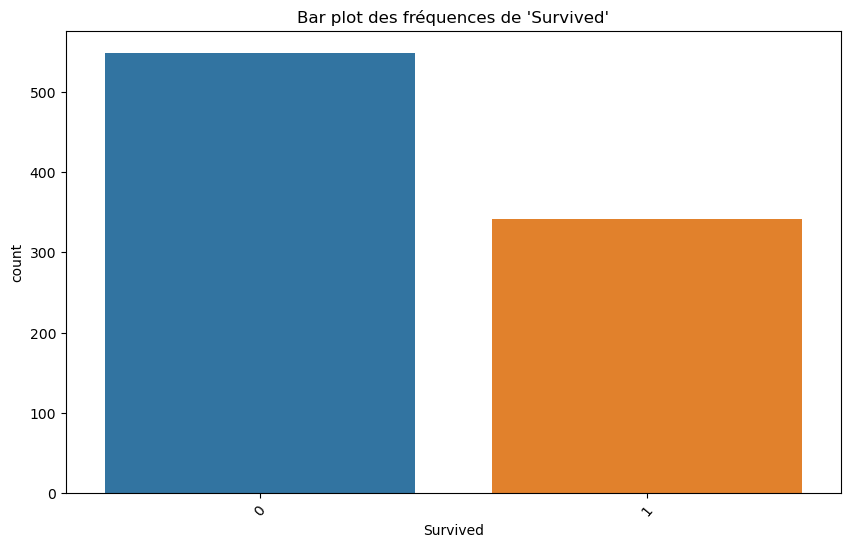

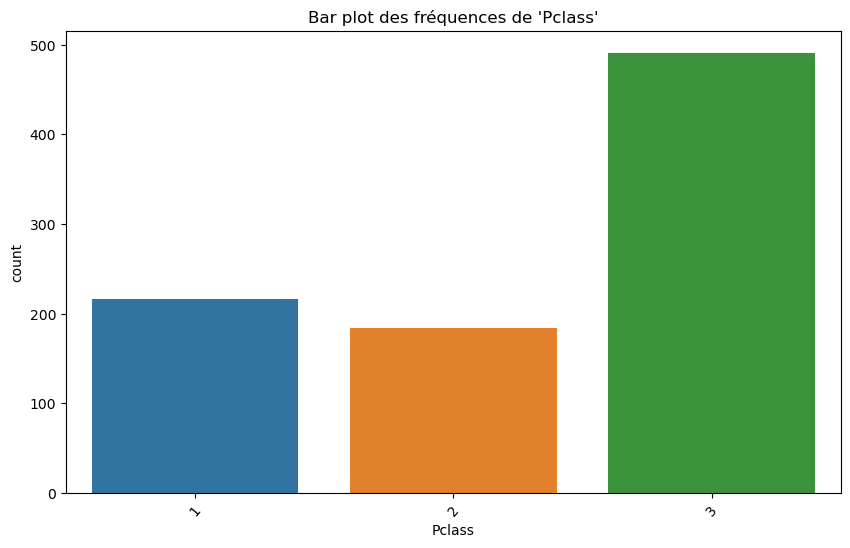

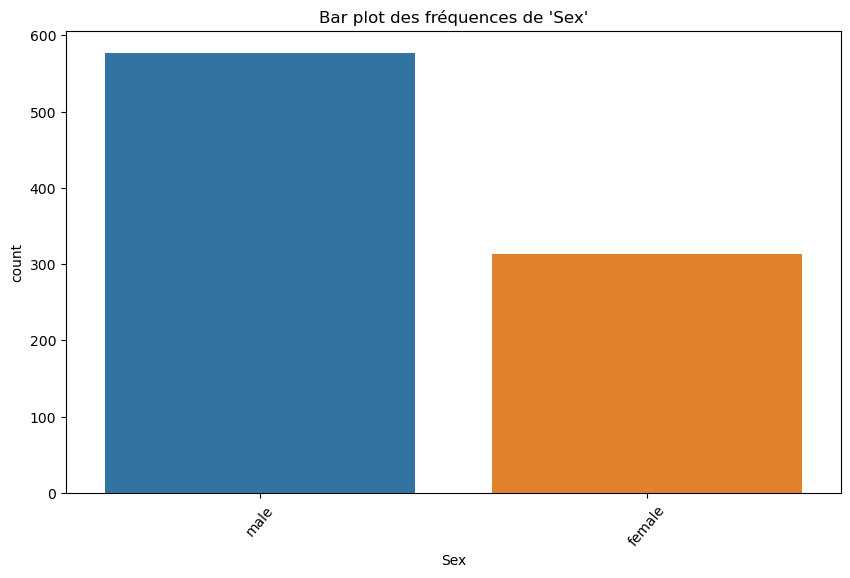

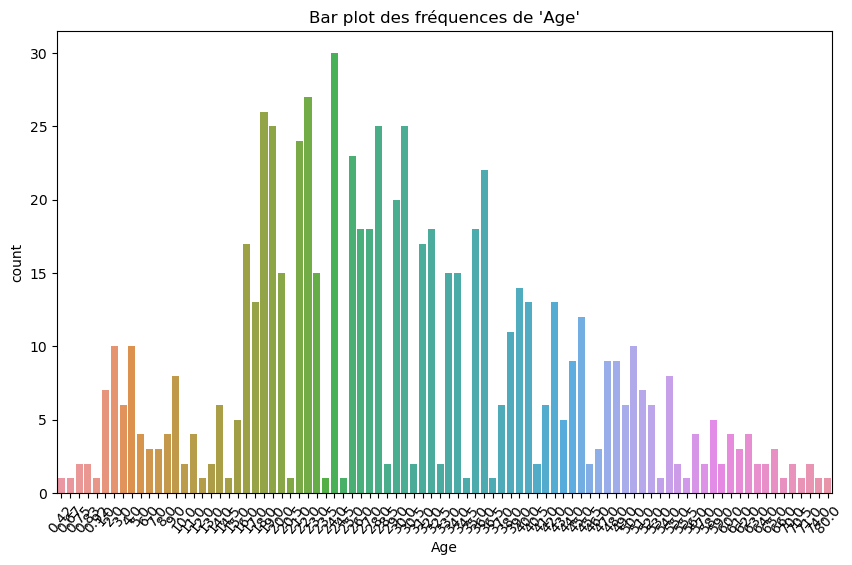

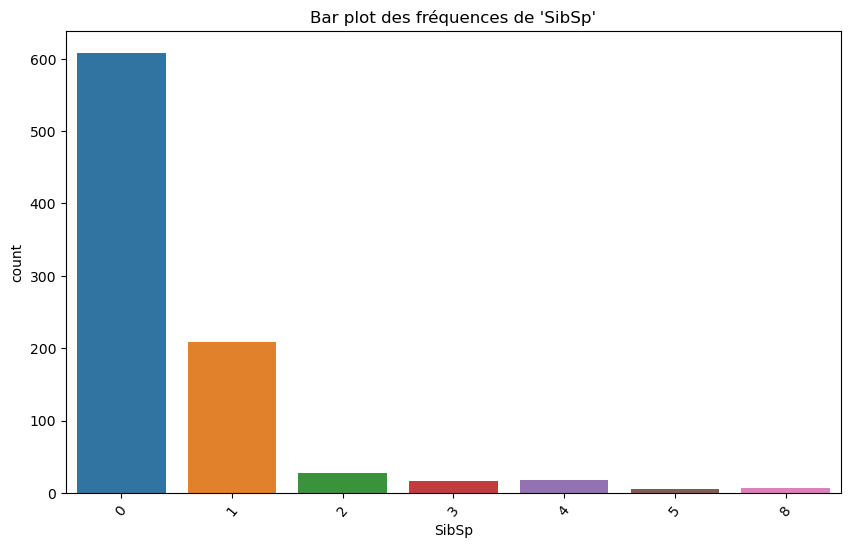

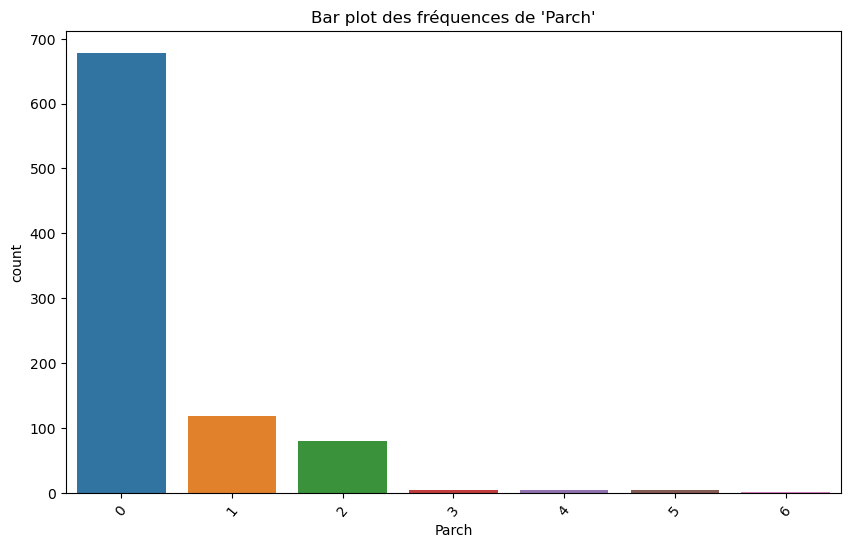

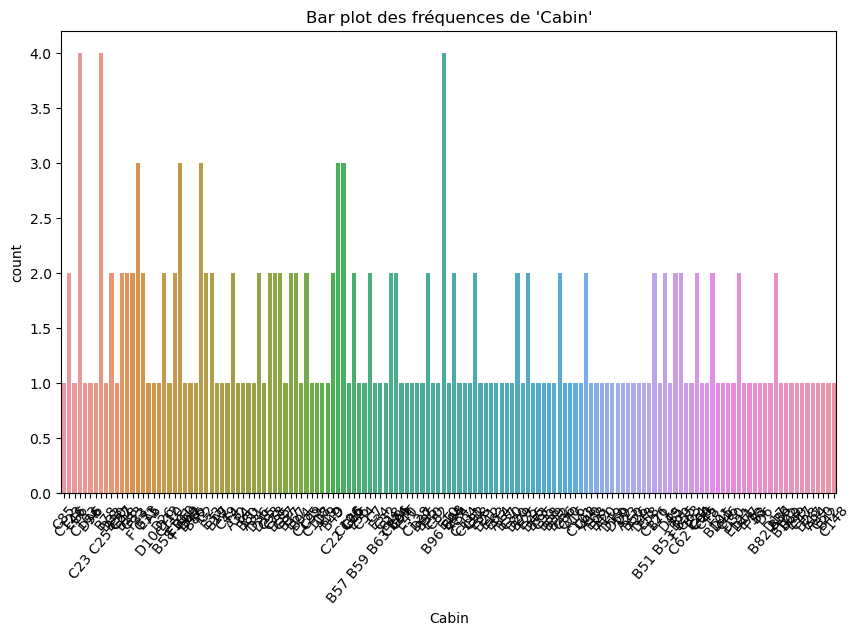

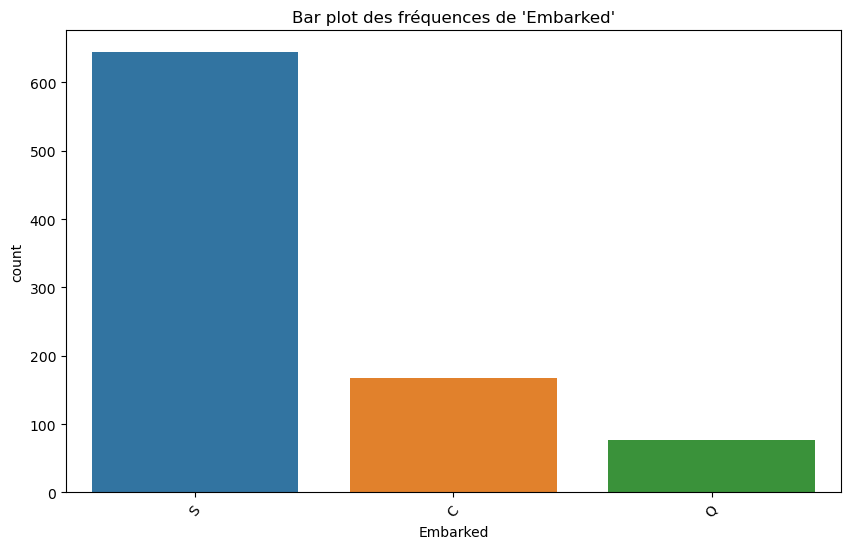

In [116]:
# Bar plots des fréquences des catégories par rapport aux variables catégoriques
for cat_col in categorienne.columns:
    plt.figure(figsize=(10, 6))
    sb.countplot(x=cat_col, data=df)
    plt.title("Bar plot des fréquences de '{}'".format(cat_col))
    plt.xticks(rotation=50)#utile lorsque vous avez un grand nombre d'étiquettes sur l'axe des x et que vous voulez éviter qu'elles se chevauchent
    plt.show()

In [118]:
#d.	Etudier les corrélations entre les variables numériques pour identifier les relations linéaires.
numeric.corr()


,PassengerId,Fare
PassengerId,1.000000,0.012658
Fare,0.012658,1.000000


In [136]:
#9.	Analyser les caractéristiques des passagers qui ont survécu par rapport à ceux qui n'ont pas survécu. 

sur1=df[df['Survived']==1]

sur1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [137]:

sur0=df[df['Survived']==0]

sur0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


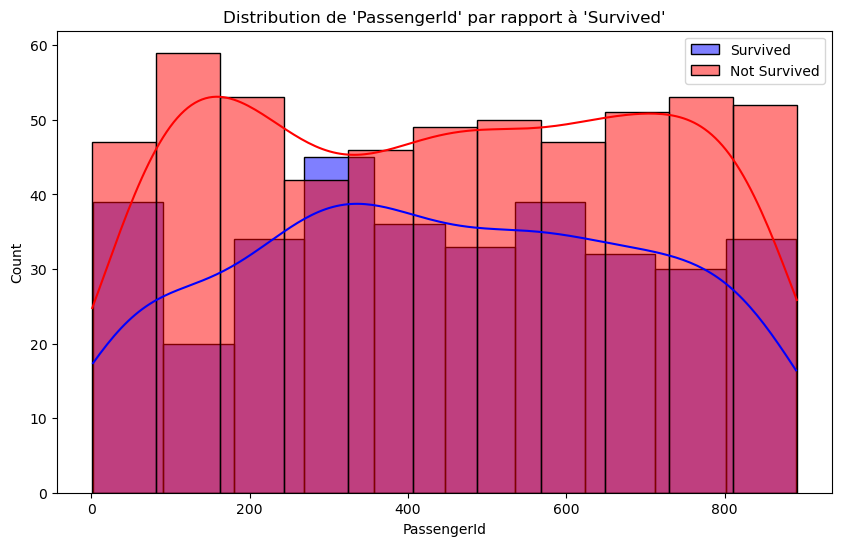

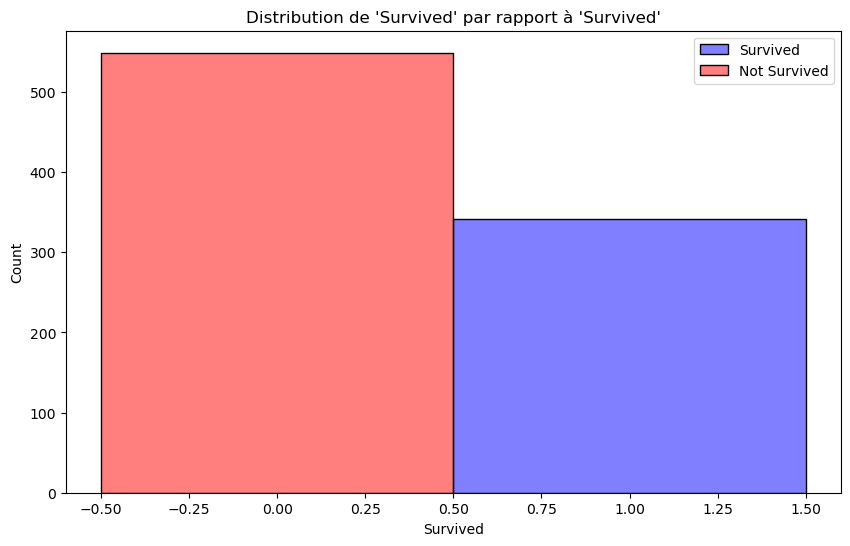

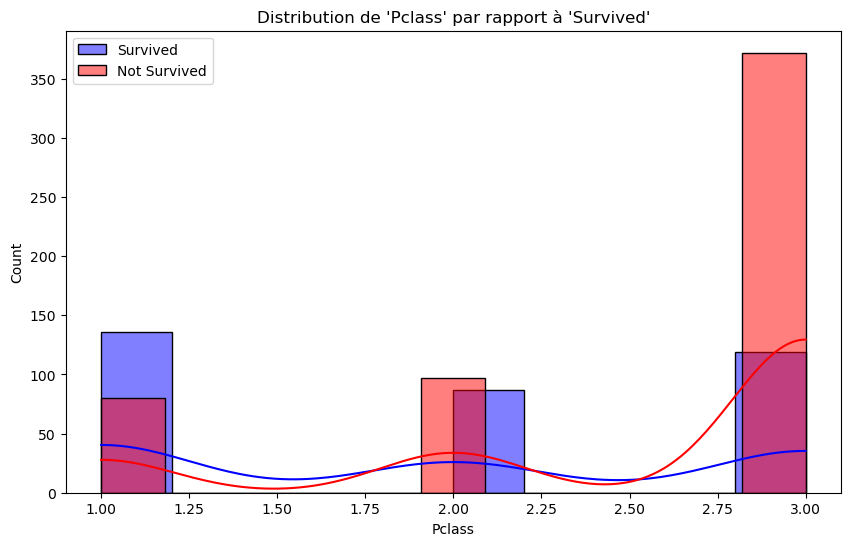

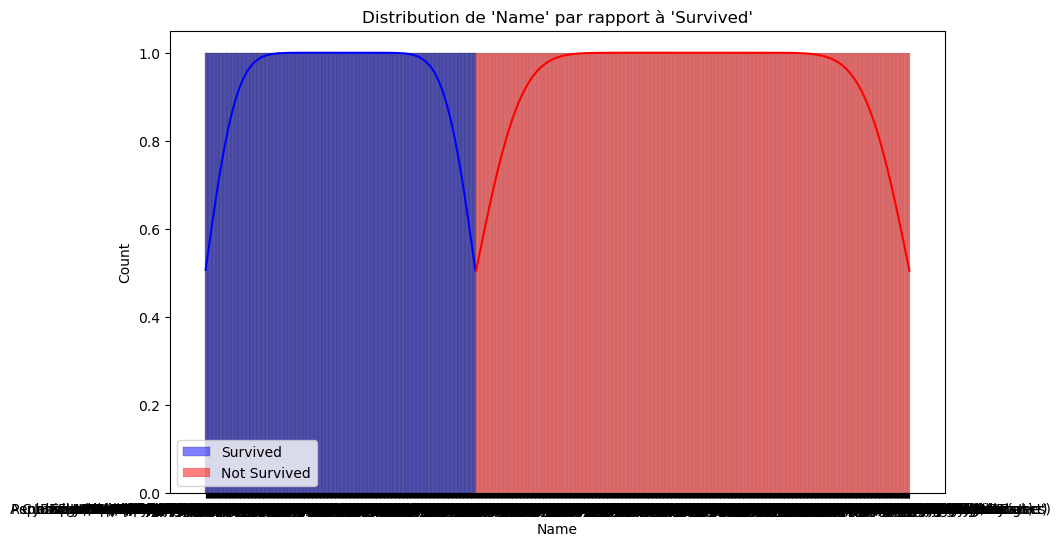

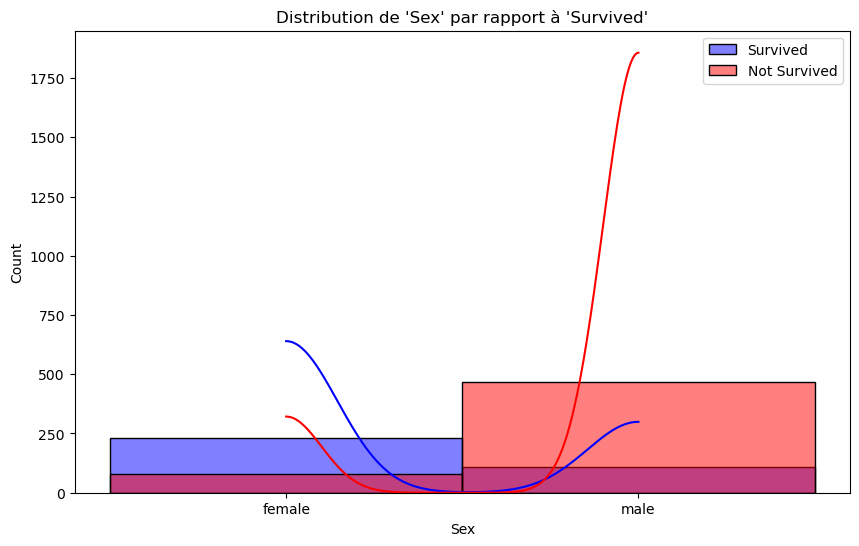

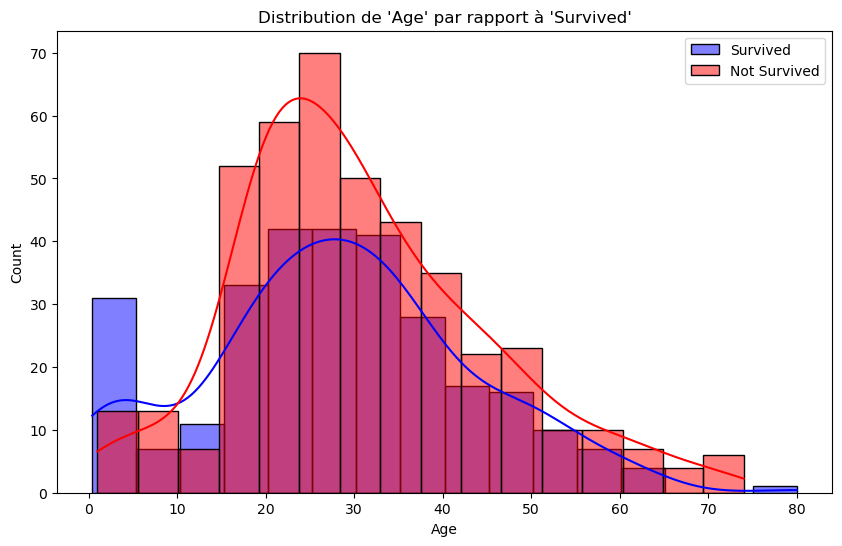

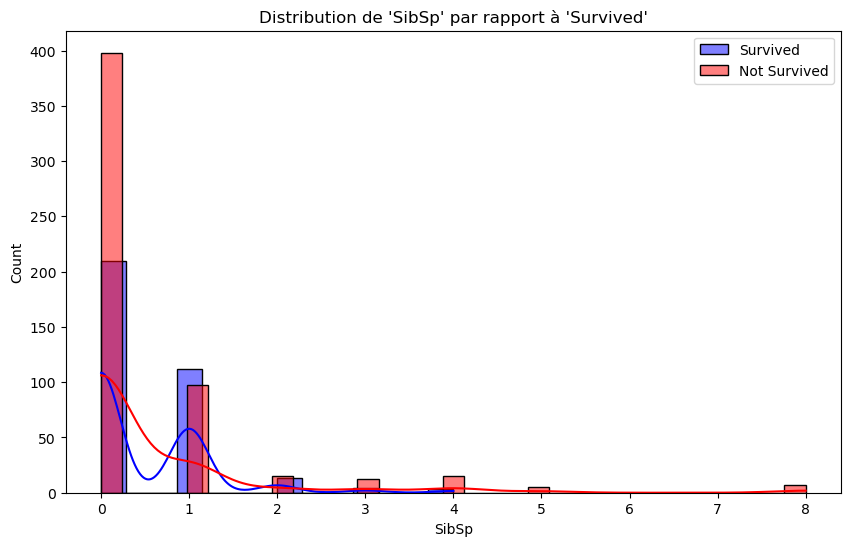

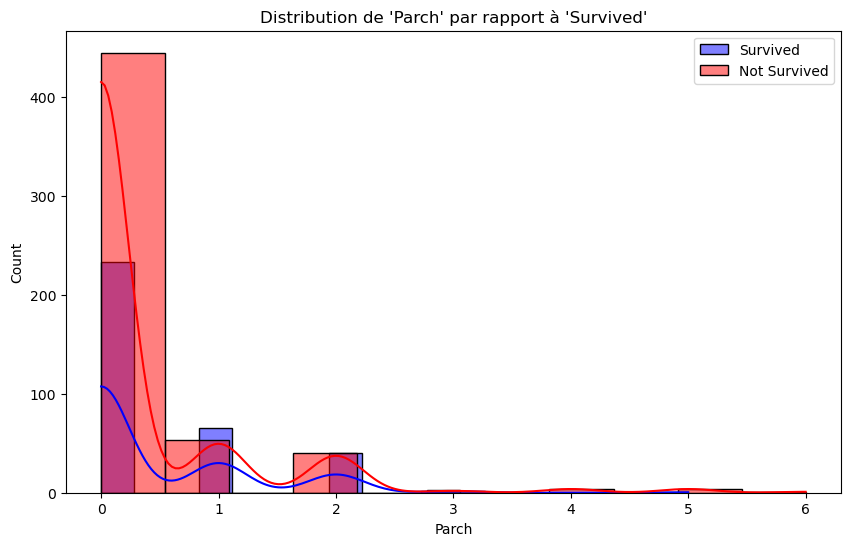

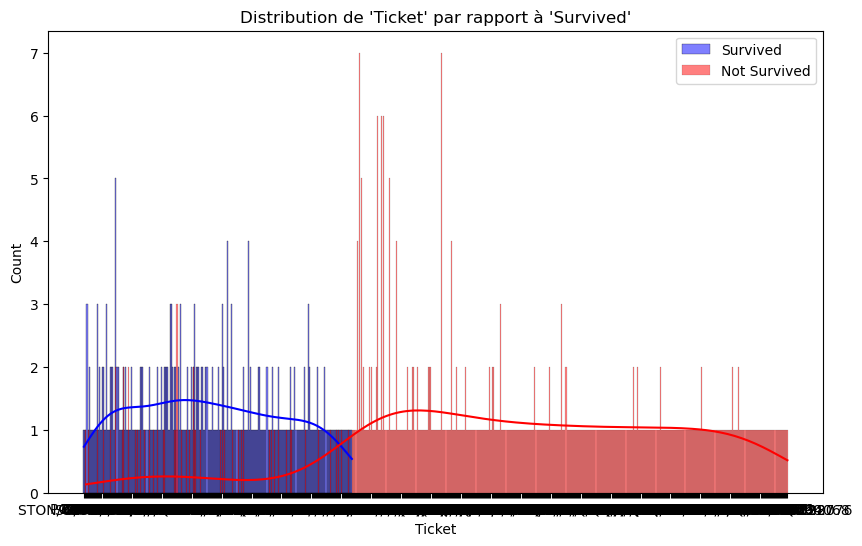

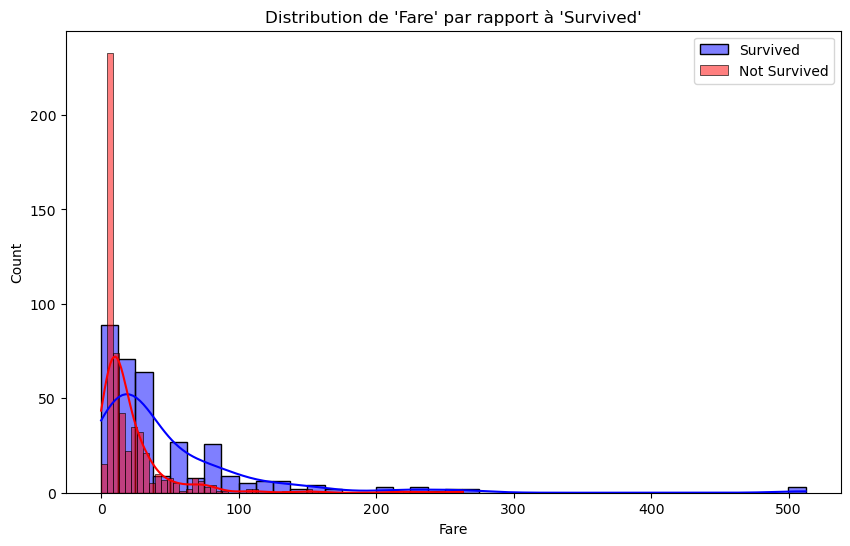

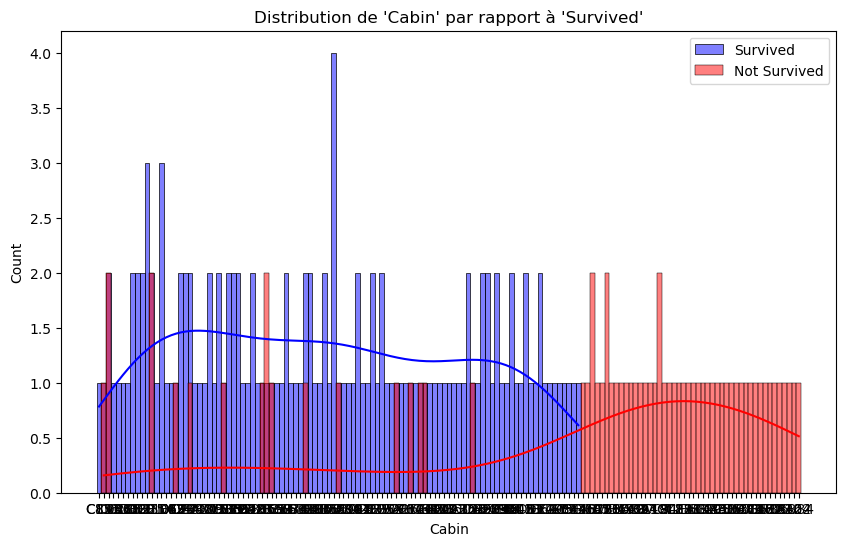

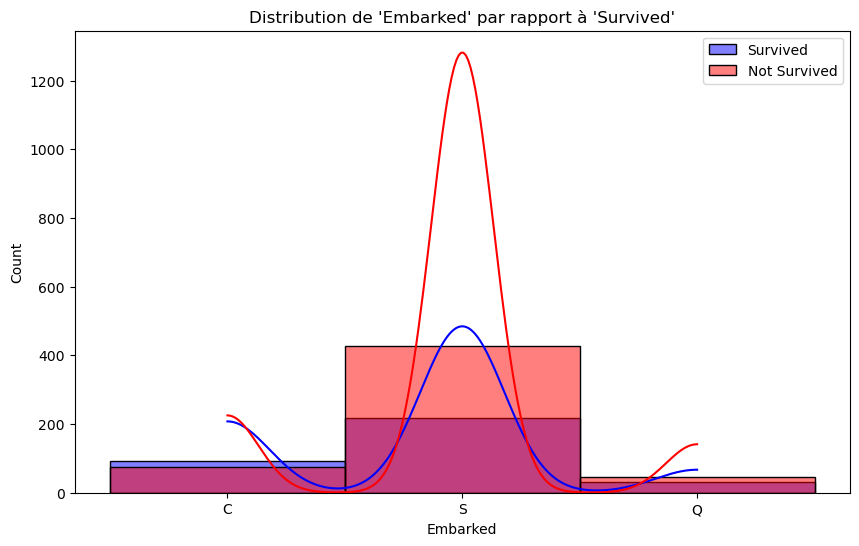

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divisez les données en deux sous-ensembles : passagers ayant survécu et passagers n'ayant pas survécu
survived_passengers = df[df['Survived'] == 1]
not_survived_passengers = df[df['Survived'] == 0]

# Analyse univariée : comparaison des distributions des caractéristiques
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(survived_passengers[column], color='blue', label='Survived', kde=True)
    '''
    KDE est une méthode utilisée pour estimer la distribution de probabilité d'une variable continue en fonction 
    d'un échantillon de données. Lorsqu'il est activé (kde=True), Seaborn ajoutera une 
    courbe lissée à l'histogramme pour montrer l'estimation de la densité kernel de la distribution des données.
    '''
    sns.histplot(not_survived_passengers[column], color='red', label='Not Survived', kde=True)
    plt.title("Distribution de '{}' par rapport à 'Survived'".format(column))
    plt.legend()
    plt.show()

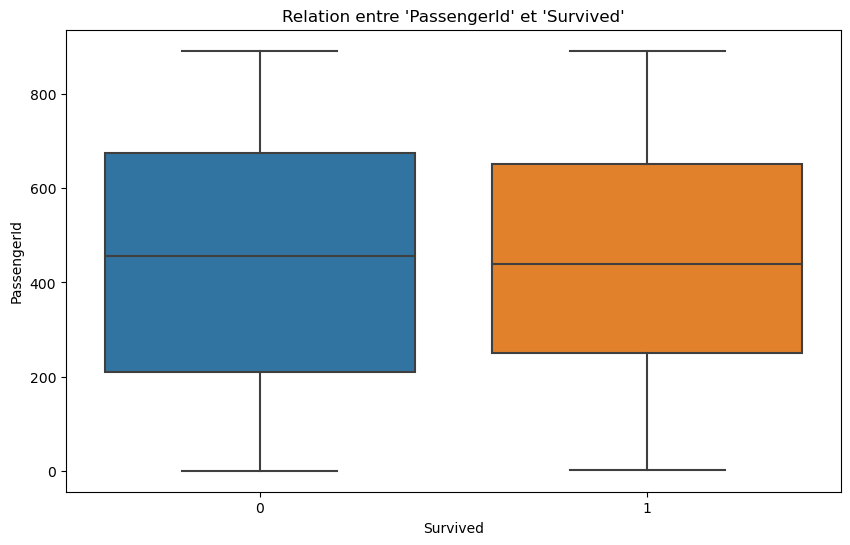

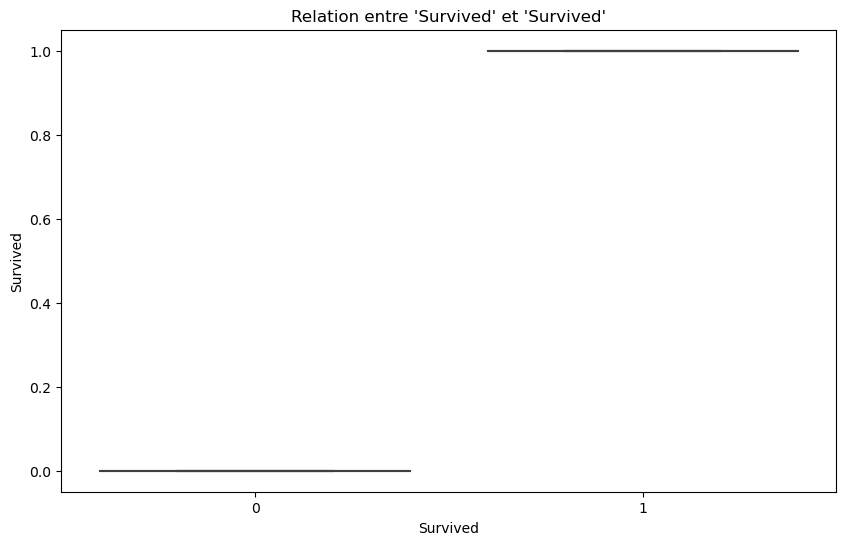

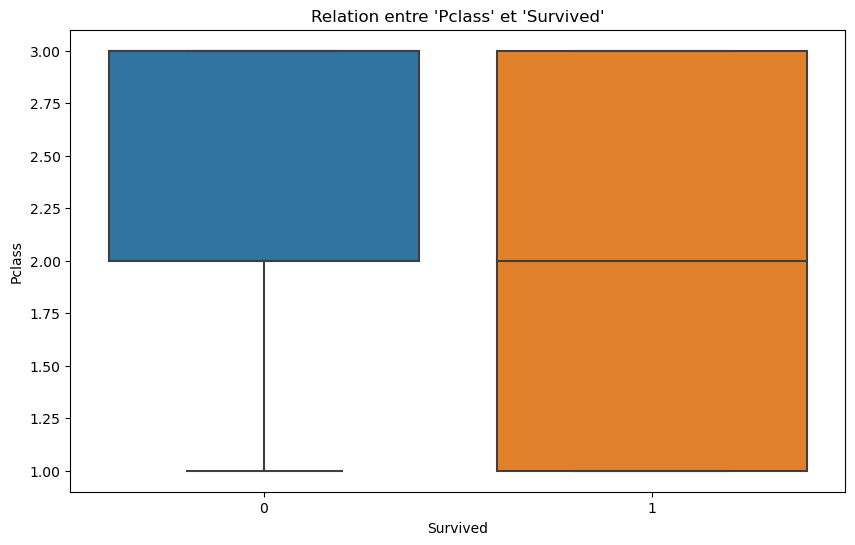

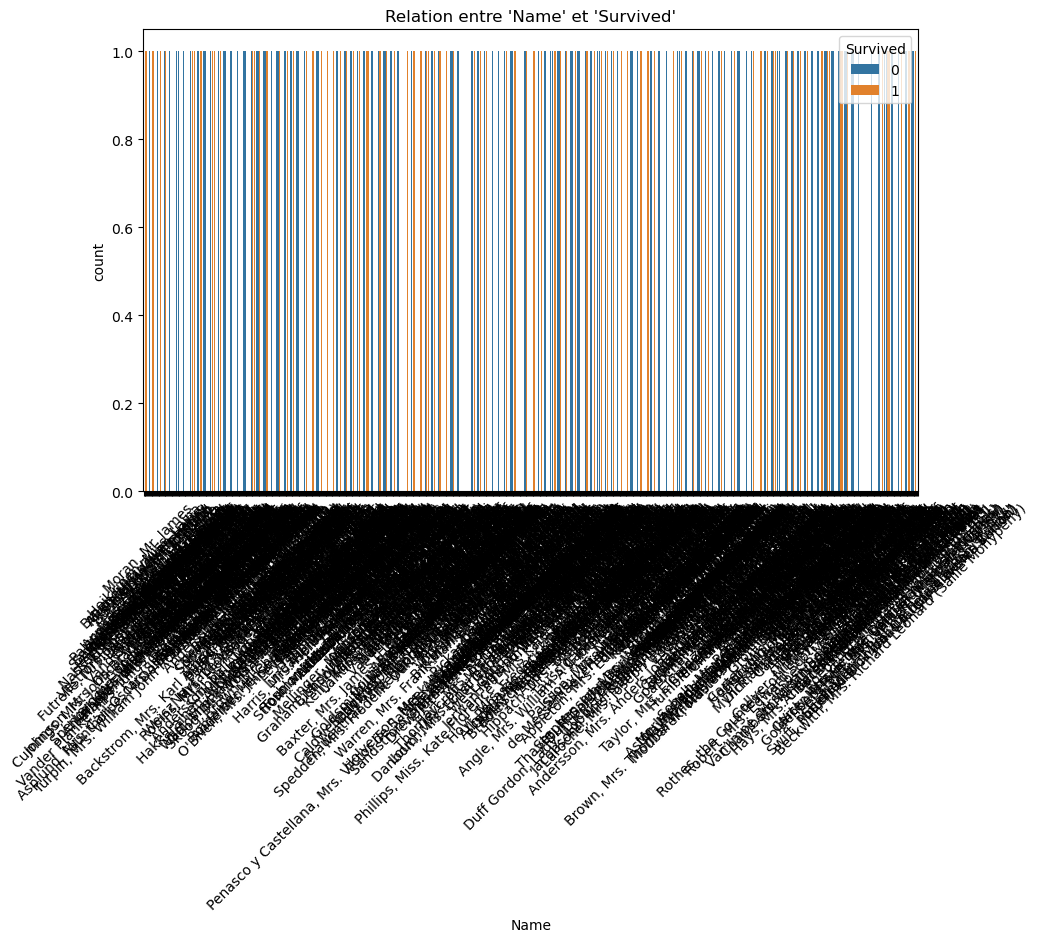

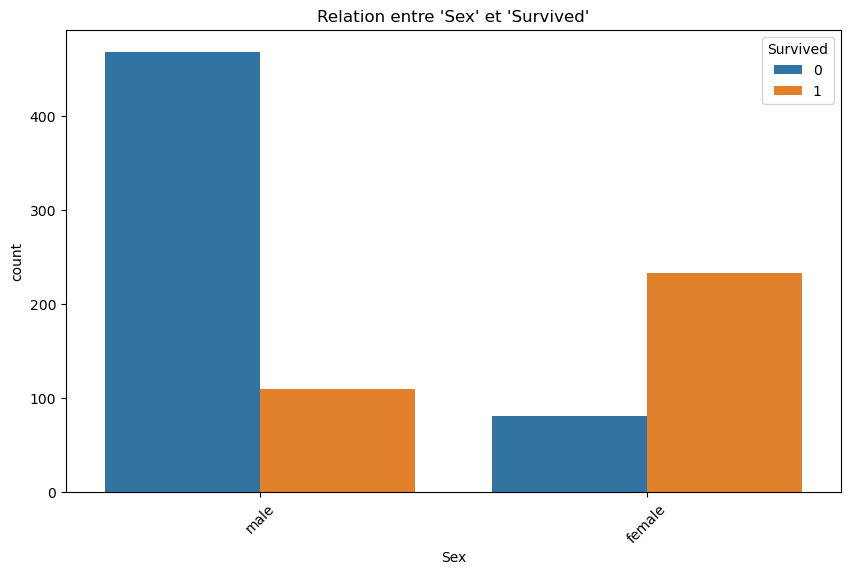

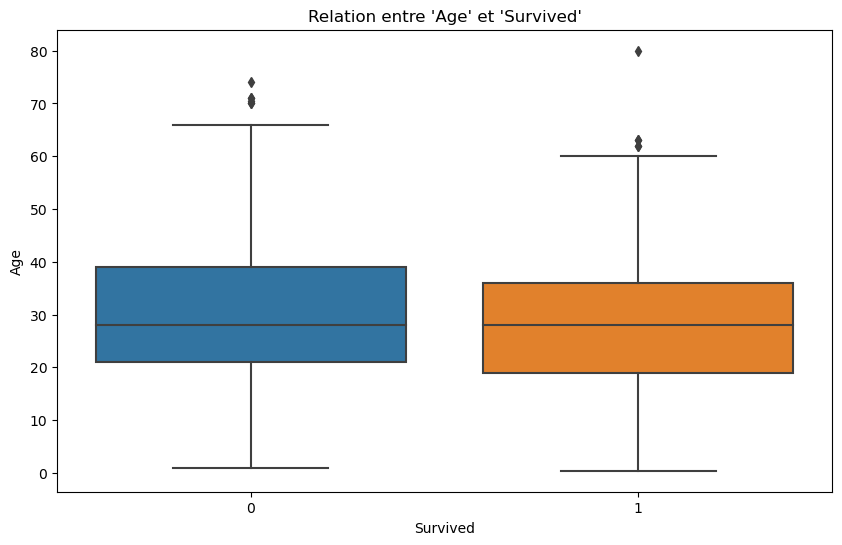

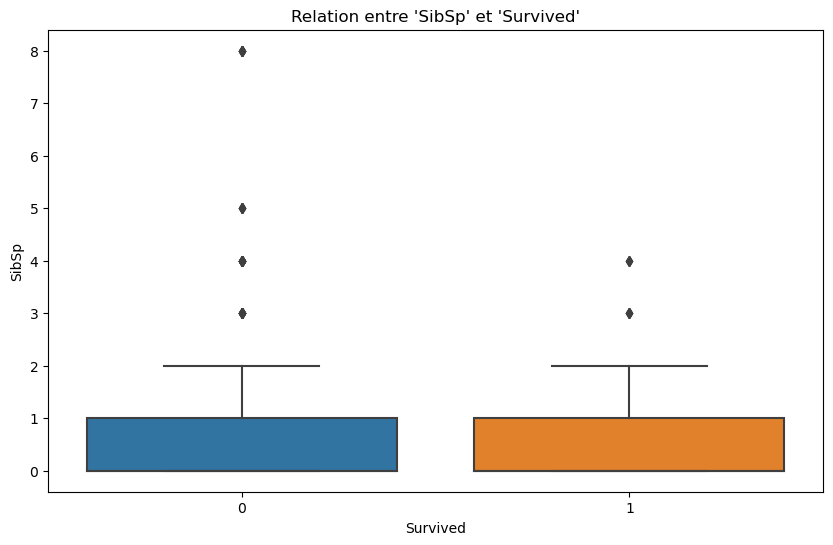

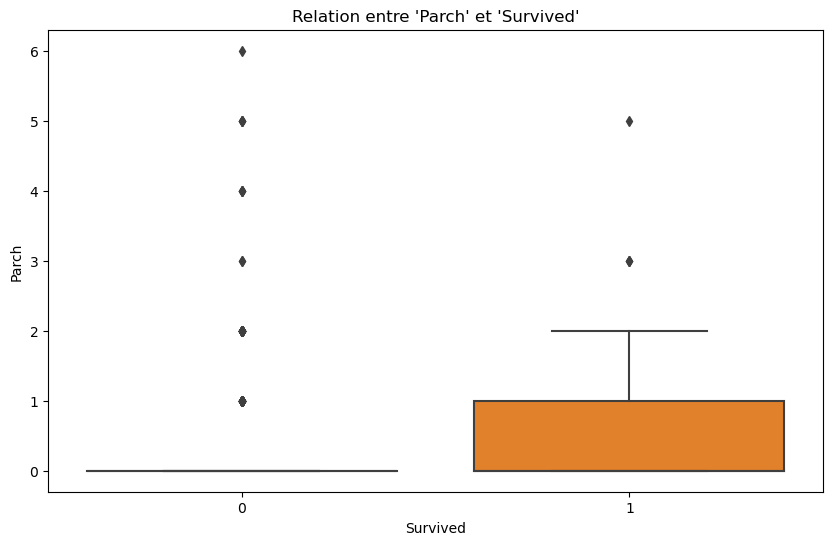

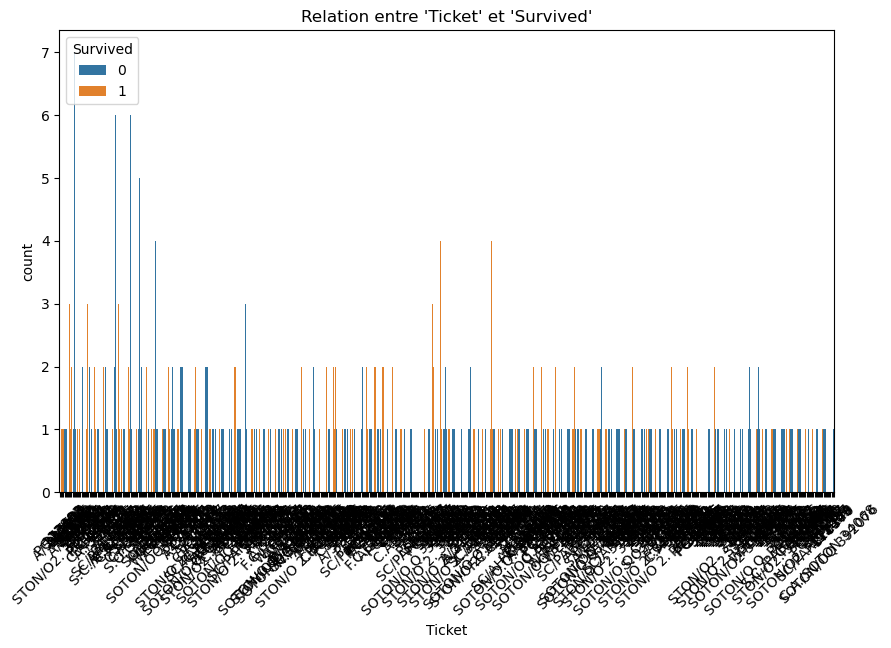

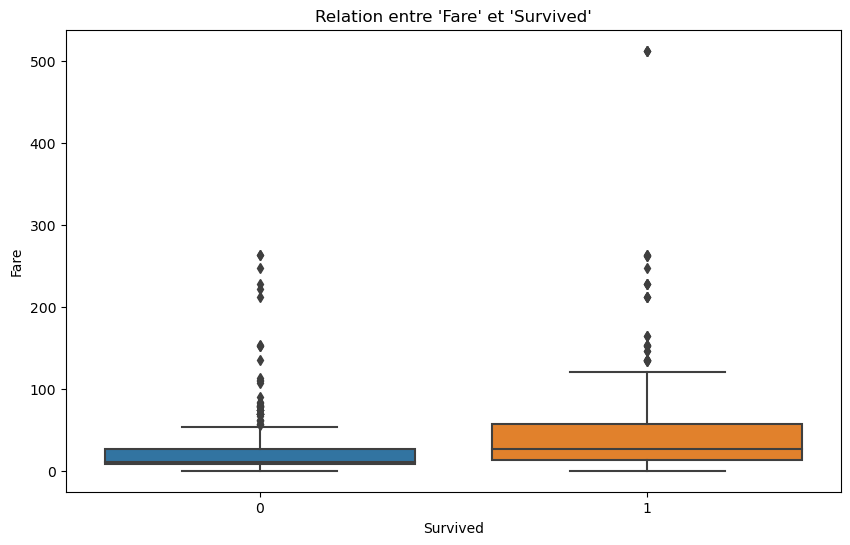

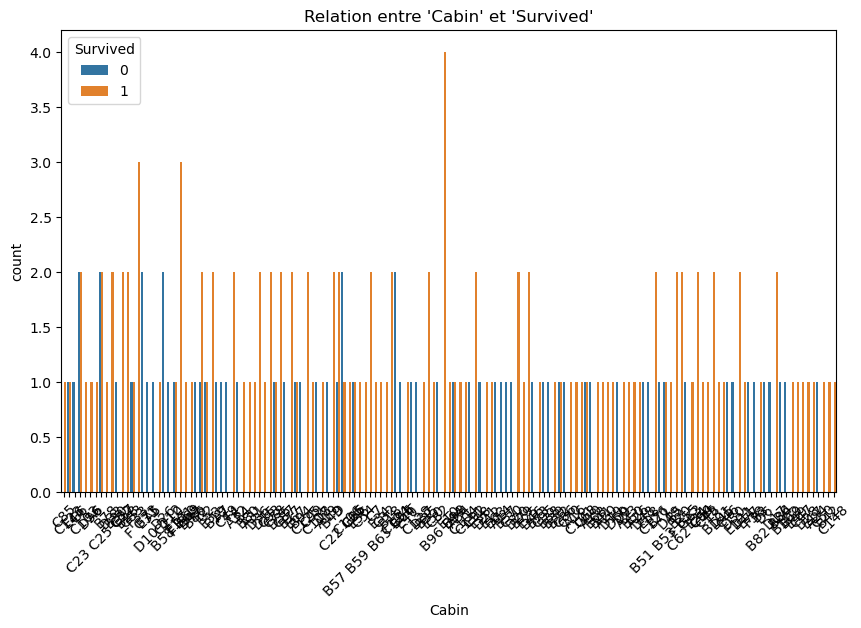

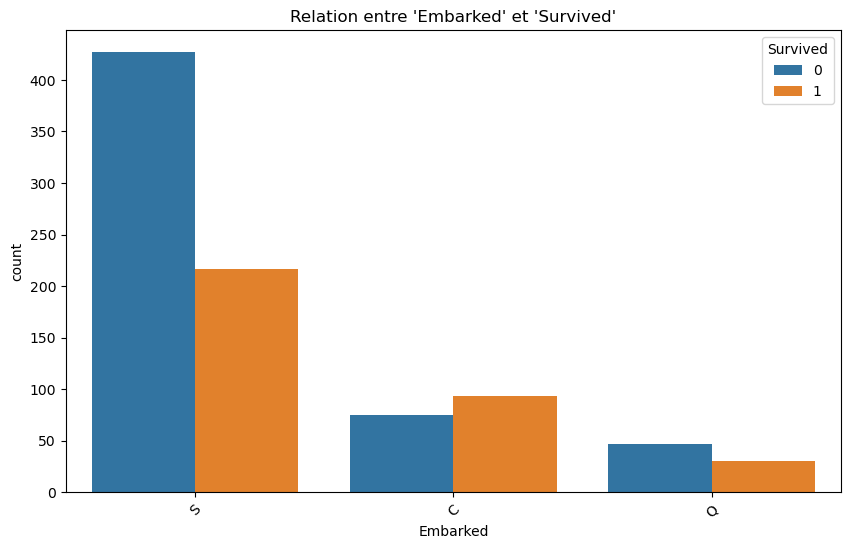

In [139]:
# Analyse bivariée : comparaison des relations entre les caractéristiques et 'Survived'
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Survived', data=df)
        plt.title("Relation entre '{}' et 'Survived'".format(column))
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Survived', y=column, data=df)
        plt.title("Relation entre '{}' et 'Survived'".format(column))
        plt.show()

In [127]:
#10.Etudier la corrélation des différentes variables avec la variable cible « survived » 

df.corrwith(df['Survived'])



PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64